# Principal Component Analysis
## Introduction

Principal Component Analysis (PCA) is a dimensionality-reduction method that is typically used to transform a high-dimensional data set into a smaller-dimensional subspace prior to applying a machine learning algorithm on the data.


Let $\mathbf{x^i} = \left[ x_1^i, x_2^i, \cdots, x_M^i \right]$ be a M-dimensional vector describing the $i$-th sample. The entire dataset of $N$ samples can be expressed as a $N \times M$ matrix $X$, whose rows are the samples:

\begin{align}
X &= \left(
\begin{array}{cccc}
x_1^1 & x_2^1  & \ldots & x_M^1  \\
x_1^2 & x_2^2  & \ldots & x_M^2  \\
\vdots & \vdots & \ddots & \vdots \\
x_1^N & x_2^N  & \ldots & x_M^N
\end{array} \right) 
\end{align}

PCA aims to transform the original data in order to maximise its variance. In practice, the new representation of the data $Y$ is linearly related to the original one:

\begin{equation} 
Y = X \cdot V
\end{equation}

The columns of $V$, $\{ \mathbf{v}_1, \cdots , \mathbf{v}_M \}$ are the principal components (PCs) of $X$, and correspond to the eigenvectors of the covariance matrix of $X$, which is defined as:

\begin{equation}
\text{cov} (X)= \frac{1}{N} \sum_n^{N} (x_n - \mu_x) \, (x_n - \mu_x)
\end{equation}

The covariance matrix, $\text{cov} (X)$, describes all relationships between pairs of measurements in our dataset $X$.

Because the covariance matrix is symmetric, the eigenvectors form an orthogonal set. The PCs (eigenvectors) correspond to the direction (in the original n-dimensional space) with the greatest variance in the data. Each eigenvector has a corresponding eigenvalue, indicating how much variance there is in the data along the corresponding eigenvector (or PC).

The dimensionality reduction can be performed by removing the PCs with the lowest eigenvalues, thus throwing away redundant features with low information content.


## Tutorial 1: PCA for dimensionality reduction on wine chemical data

In this tutorial we will use real experimental data, representing the chemical composition of about 178 wine samples, from three different cultivars in the same region in Italy.
For each wine, the analysis determined the quantities of 13 constituents, listed below:

<table>
  <tr>
    <th>Feature No.</th>
    <th>Wine Chemical Composition</th> 
  </tr>
  <tr>
    <td>1</td>
    <td>Alcohol</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Malic acid</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Ash</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Alcalinity of ash</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Magnesium</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Total phenols</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Flavanoids</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Nonavanoid phenols</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Proanthocyanins</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Color intensity</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Hue</td>
  </tr>
  <tr>
    <td>12</td>
    <td>OD280/OD315 of diluted wines</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Proline</td>
  </tr>
  <caption>Wine chemical composition*
  
  *Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science</caption>
</table><br>

The data file <i>./data/wineInputs.txt</i> contains 178 lines, each with the 13 entries representing the wine chemical composition (descriptor). The file  <i>./data/wineOutputs.txt</i> contains the type of each wine: either 1, 2 or 3.

In this tutorial, the objective is to reduce the dimensionality of the descriptors by identifying and eliminating the redundant ones with PCA. 

In [2]:
data.in <- read.csv('../data/wineInputs.txt',header=F,sep = ',',dec='.')
head(data.in)


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
1.51430,-0.560670,0.23140,-1.16630,1.908500,0.80672,1.03190,-0.65771,1.22140,0.25101,0.36116,1.84270,1.010200
0.24560,-0.498010,-0.82567,-2.48380,0.018094,0.56705,0.73157,-0.81841,-0.54319,-0.29250,0.40491,1.11030,0.962530
0.19633,0.021172,1.10620,-0.26798,0.088110,0.80672,1.21210,-0.49701,2.13000,0.26826,0.31741,0.78637,1.391200
1.68680,-0.345840,0.48655,-0.80697,0.928300,2.48440,1.46240,-0.97911,1.02930,1.18270,-0.42634,1.18070,2.328000
0.29487,0.227050,1.83520,0.45067,1.278400,0.80672,0.66149,0.22616,0.40028,-0.31838,0.36116,0.44834,-0.037767
1.47740,-0.515910,0.30430,-1.28610,0.858280,1.55770,1.36230,-0.17560,0.66235,0.72981,0.40491,0.33566,2.232700


Apply zscore normalization to create 'X' dataframe, use *scale* function

Then run the PCA using the *prcomp* function to create a 'pca.output' variable. Note that we set scale=F and center=F as we have already taken care of z-scaling in the step above 

In [6]:
pca.output<-prcomp(data.in)

We can split up the output of the PCA, where D is the eigenvalues, V is the eigenvectors and Ypca is the transformed data. D is retrieved like this:

In [ ]:
D <- pca.output$sd^2
head(D)

Eigenvectors are referred to as 'rotation' in R, set V to these values.

In [ ]:
V <- pca.output$rotation

Transformed data, which we will set to Yn, is called simply called 'x'

In [7]:
Ypca <- pca.output$x

The normalized cumulative sum (cumsum) of eigenvalues
assuming D are the eigenvalues from PCA tell use how much variation each PC explains. (Hint this information can also be found in summary(pca.output)).

Name this variable 'idc'

We plot normalized cumulative sum to understand the contributions of the obtained PCs

In [ ]:
plot(idc,xlab='# principal components',ylab='cumulative sum')

# K-means clustering
## Introduction
K-means is an example of unsupervised learning algorithms for clustering problems.
Suppose we have a data set $X=\{ \mathbf{x}_1 \cdots \mathbf{x}_N \}$ consisting of $N$ observations of a random $D$-dimensional Euclidean variable $\mathbf{x}$. Our goal is to partition the data set into some number $K$ of clusters, located around their centroids $\mathbf{m}_k=\{\mathbf{\mu}_1 \cdots \mathbf{\mu}_K \}$. We assume that the value of $K$ is given.

K-means clustering can be solved by Expectation Maximisation (EM) algorithm which consists of two steps: E-step and M-step.
On each E-step, we find the Euclidean distance between $N$ data points and $K$ cluster centers. The most probable cluster for each data sample $\mathbf{x}_n$ is the one with nearest centroid:

\begin{align}
z_n^*=\text{arg} \, \min\limits_{k} \parallel \mathbf{x}_n - \mathbf{\mu}_k \parallel^2
\end{align}

The M-step updates each cluster center by computing the mean of all points assigned to it:

\begin{align}
\mathbf{\mu}_k=\frac{1}{N_k} \sum_{n:z_n = k} \mathbf{x}_n
\end{align}

The pseudo-code of K-means clustering can be summarised as following:

<table>
  <tr>
    <td>
    Randomly select cluster centers ($\mathbf{m}_k$) as initial centroids; <br/> 
<b>while</b> <i>centroids change</i> <b>do</b>:     
&emsp; <b>E-step</b>: <br/> 
&emsp; Calculate the distance between each data point and cluster center (centroid); <br /> 
&emsp; Assign each data point to its closest cluster center (centroid): $z_n^*=\text{arg} \, \min\limits_{k} \parallel \mathbf{x}_n - \mathbf{\mu}_k \parallel^2$; <br /> 
&emsp; Form K clusters by assigning each point to its closest centroid; <br /> 
<br/> 
&emsp; <b>M-step</b>: <br />
&emsp; Update each cluster center by computing the mean of all points assigned to it: $\mathbf{\mu}_k=\frac{1}{N_k} \sum_{n:z_n = k} \mathbf{x}_n$; <br /> 
<b>end</b> <br /> 
<b>Result</b>: Cluster indices of each data point (assignments)    
  </td>
  </tr>
</table>

In [ ]:
# We create synthetic data using two Gaussian distributions
# First, we determine the mean and standard deviation of
# two Gaussian distributions
library(MASS)
X1 = mvrnorm(n = 300, c(5,2), rbind(c(0.4,-0.0255),c(-0.0255,0.2)))
X2 = mvrnorm(n = 100, c(9,7), rbind(c(0.1,0),c(0,0.4)))

plot(X1,xlim=c(2,10),ylim=c(0,10))
points(X2)


The result in the Figure shows very well separated data.
Of course, it is very easy to visualize the separation/group by human eye, but clustering aims to do this process automatically. K-means clustering is one of simple algorithm to cluster/group data sets.

In this tutorial, the number of clusters K is assumed to be known. There are some automatic
methods in determining K parameter, but they are not discussed here.

We then apply <i>K-means</i> function on the data (if you are interested the detailed of the algorithm, you can take a look at <i>Kmeans.py</i>). The function returns the cluster indices as well as the cluster's
centroids. Finally, we plot the data for each cluster using different colour.

The produced Figure demonstrates how K-means algorithm successfully forms two clusters in the data.
The above problem of course is very easy to visualize because the generated data set is very well separated. The next exercise will demonstrate more challenging problem. The exercise is a good example to understand how K-means can be useful in practice.

In [ ]:
# In this part, we will apply K-means clustering algorithm to
# the above generated data

k = 2 # determine the number of cluster
X.both = rbind(X1,X2)
kmeans.out <- kmeans(X.both,k)

k1=kmeans.out$cluster==1
k2=kmeans.out$cluster==2

#plot(X.both[[k1,: ]],xlim=c(2,10),ylim=c(0,10))

plot(X.both[k1,],xlim=c(2,10),ylim=c(0,10),col='green')
points(X.both[k2,],col='red')
points(kmeans.out$centers,pch=17,cex=2) # this is the estimated center



## Exercise 1: K-means clustering on chemical wine data

This exercise is a continuation of previous wine exercise (PCA). 
We will use the wine data set, described in the previous notebook.

Based on the eigenvalues generated by PCA in the data, it is known that there are three most dominant PCs. 
The objective is to apply K-means on the reduced data (using the first three PCs) for clustering three different groups of wine. 
We know the actual classiffication of the wine from the data set into three types, so we hope that the clusters generated through K-means mimic the actual wine types. 

### Exercise 1.a:
We provide the template for this exercise below.
Perform K-means on the reduced data (using only three PCs). Produce a 3D plot of the grouped wine data based on clustering and compare the results with the actual wine classes.

We assume that we know the number of cluster, set variable 'K' to 3 clusters

In [8]:
k=3

apply K-means clustering on the first three PCs data (hint: PCs are stored in the Ypca matrix as columns)

In [12]:
kmeans.out <- kmeans(Ypca[,1:3],k)
(kmeans.out$cluster)

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3
 [75] 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

plot the output and real classes here. Try to use a 3D graph. You will need the 'scatterplot3d' library to complete this. Go ahead and load it:

In [13]:
# MAKE 3D graph here
library(scatterplot3d)

Next plot the results of the kmeans algorithm in 3D as follows:

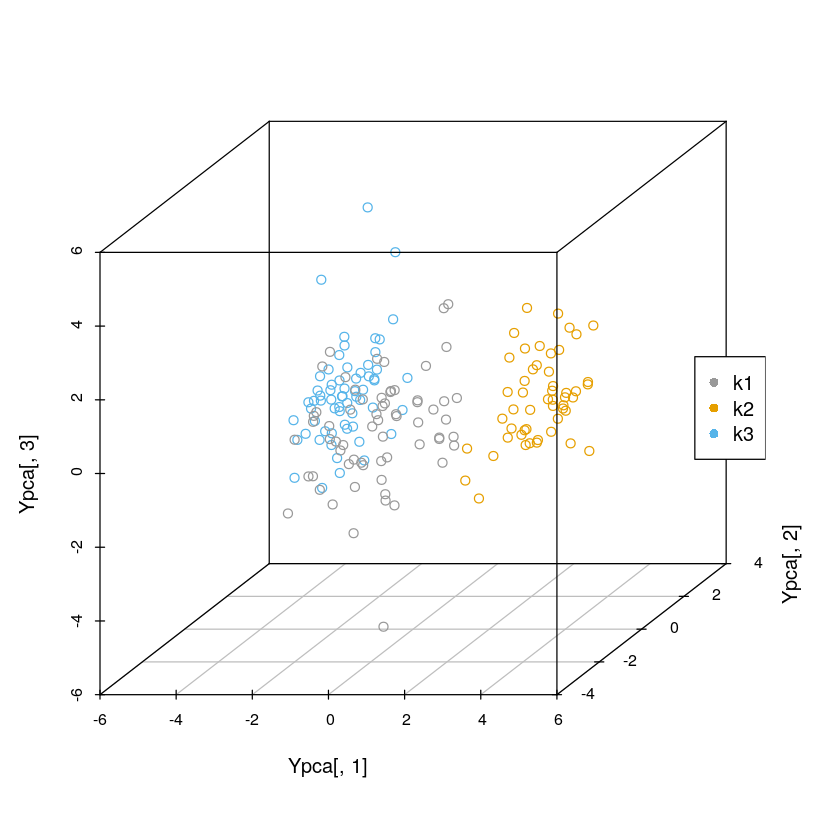

In [14]:

colors <- c("#999999", "#E69F00", "#56B4E9")
colors <- colors[kmeans.out$cluster]
scatterplot3d(Ypca[,1],Ypca[,2],Ypca[,3],color=colors,
             )
legend("right",col=c("#999999", "#E69F00", "#56B4E9"),legend=c('k1','k2','k3'),pch=16)

wineOutputs contains the true classes, let's load it up:

In [15]:
data.out <- read.csv('../data/wineOutputs.txt',header=F,sep = ',',dec='.')

And plot the true classes below for comparison with our estimate:

### Exercise 1:
Make a simple function to count the number of correct group index (by comparing it with the true class data)

### Exercise 2:
Perform K-means clustering without applying PCA on the data and compare the results with the demo 3.

## Exercise 3: K-means clustering on atmospheric variables

Atmospheric new-particle formation (NPF) is an important source of climatically
relevant atmospheric aerosol particles. 
NPF is the episodes where the ultra-fine aerosol particles appearing in the atmosphere and growing subsequently to larger sizes until they reach sizes where they potentially scatter solar irradiation and impact cloud condensation nuclei (CCN).
This fact has motivated scientists across the world to study the atmospheric variables which contribute to the process of NPF. Below Figure shows two examples of new-particle formation events, the Figures on the left and right hand sides constitute non-event and event days, respectively.

<table>
  <caption align="bottom">Examples of non-event and event days at Hyyti{\"a}l{\"a}, SMEAR II, Finland, in May 2005.</caption>
  <tr><td>
    <th><img src="../images/NonEventDay.png" width="200px"></th>
    <th><img src="../images/EventDay.png" width="200px"></th>
  </tr>
</table>

In this exercise, we have a data set consists of two daily averaged atmospheric variables: global radiation ($W/ms^{-2}$) and Relative Humidty (%). They were measured from January 1996 - December 2014 at Hyyti{\"a}l{\"a}, SMEAR II, Finland. 


Load the data set "../data/DataForClusteringFinal.txt"




We will use a matrix 'X' to represent the data which we will use as a unsupervised learning. X is column 2 and 3 of the *Data* above which is RH and global radiation.

To check how our method performs, *Data* also contains our expected output which is known as *labels* in data mining speak. This is columns 4 (event day) and 5 (non-event day). Assign this expected output as 'Y'. 


Run the clustering on X. How does it compare to the real output Y? 